In [2]:
# import
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy
import scipy.spatial
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

C:\Users\jeffo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [4]:
root = '\\Users\\jeffo\\Coding\\ihc_cellcount_cytoplasmic\\Data'

In [5]:
krt_test = os.path.join(root,'images')
path_sets = [krt_test] 

In [6]:
#defining the image path
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
       img_paths.append(img_path)

In [7]:
model = CSRNet()

In [8]:
model = model.cuda()

In [18]:
#loading the trained weights
checkpoint = torch.load('600epoch_KRTmodel_03_shuffle.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [22]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

72.54879570007324


Predicted Count :  50


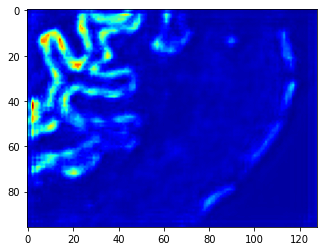

Original Count :  62


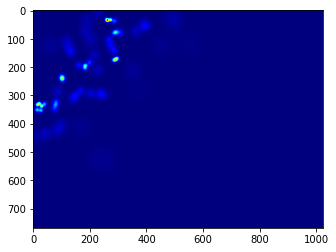

Original Image


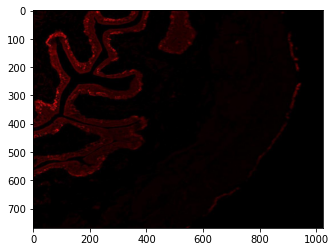

In [20]:
from matplotlib import cm as c
img = transform(Image.open('\\Users\\jeffo\\Coding\\ihc_cellcount_cytoplasmic\\Data\\images\\IMG_1.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('\\Users\\jeffo\\Coding\\ihc_cellcount_cytoplasmic\\Data\\ground_truth\\IMG_1.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('\\Users\\jeffo\\Coding\\ihc_cellcount_cytoplasmic\\Data\\images\\IMG_1.jpg'))
plt.show()

Predicted Count :  482


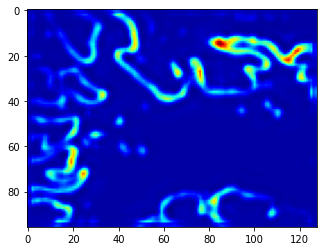

Original Count :  349


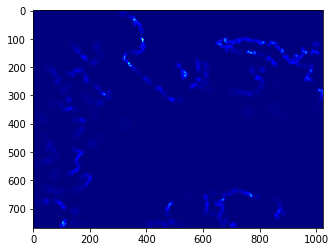

Original Image


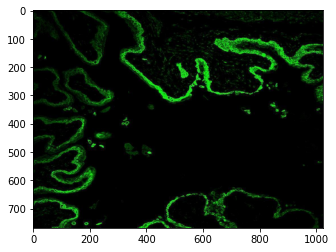

In [21]:
from matplotlib import cm as c
img = transform(Image.open('\\Users\\jeffo\\Coding\\ihc_cellcount_cytoplasmic\\Data\\images\\IMG_6.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('\\Users\\jeffo\\Coding\\ihc_cellcount_cytoplasmic\\Data\\ground_truth\\IMG_6.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('\\Users\\jeffo\\Coding\\ihc_cellcount_cytoplasmic\\Data\\images\\IMG_6.jpg'))
plt.show()